In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

2023-08-07 20:55:14.840928: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:55:14.877400: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:55:14.878880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 20:55:15.579937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(512, activation="relu"),
      layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

2023-08-07 20:55:16.730363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-07 20:55:16.731016: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/july31_autoencoder_data/Label2_InputSet.csv')
#df1.drop('pt', axis=1, inplace=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,93.0,2796.0,5126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.483410
1,0.0,0.0,0.0,120.0,979.0,2313.0,7972.0,20743.0,2268.0,0.0,0.0,0.0,0.0,-5.783540
2,0.0,0.0,0.0,743.0,4598.0,5152.0,6335.0,0.0,0.0,0.0,0.0,0.0,0.0,1.418940
3,0.0,0.0,0.0,0.0,90.0,4232.0,4118.0,5052.0,1361.0,0.0,0.0,0.0,0.0,1.422070
4,0.0,0.0,866.0,6999.0,5229.0,4360.0,5783.0,2344.0,0.0,0.0,0.0,0.0,0.0,-4.340750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40755,0.0,0.0,553.0,3003.0,2685.0,2490.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430322
40756,0.0,18.0,6233.0,9005.0,12794.0,5152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.519279
40757,0.0,0.0,0.0,0.0,490.0,1254.0,1724.0,1364.0,953.0,0.0,0.0,0.0,0.0,-3.239400
40758,0.0,0.0,0.0,1246.0,2082.0,5428.0,1841.0,0.0,0.0,0.0,0.0,0.0,0.0,0.982055


In [4]:
df_Untracked_0 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/july31_autoencoder_data/UntrackedSample.csv')
df_Untracked = df_Untracked_0[:10000]

In [5]:
len(df_Untracked)

10000

In [6]:
normal_train_data = df1.values
normal_train_data.shape

(40760, 14)

In [7]:
normal_train_data = df1.values
#X_test = df3.values

anomalousData = df_Untracked.values

scaler = StandardScaler()
normal_train_data= scaler.fit_transform(normal_train_data.reshape(-1, normal_train_data.shape[-1])).reshape(normal_train_data.shape)
#X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

anomalousData = scaler.fit_transform(anomalousData.reshape(-1, anomalousData.shape[-1])).reshape(anomalousData.shape)


train_data, test_data = train_test_split(
    normal_train_data, test_size=0.2, random_state=21
)

#min_val = tf.reduce_min(train_data)
#max_val = tf.reduce_max(train_data)

#train_data = (train_data - min_val) / (max_val - min_val)
#test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
test_data
len(anomalousData)

10000

In [8]:
len(train_data)

32608

In [9]:
autoencoder.compile(optimizer='adam', loss='mae')


Epoch 1/200
32/32 [==============================] - 1s 20ms/step - loss: 0.6172 - val_loss: 0.4737
Epoch 2/200
32/32 [==============================] - 0s 11ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 4/200
32/32 [==============================] - 0s 10ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 5/200
32/32 [==============================] - 0s 9ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 6/200
32/32 [==============================] - 0s 9ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 7/200
32/32 [==============================] - 0s 9ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 8/200
32/32 [==============================] - 0s 9ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 9/200
32/32 [==============================] - 0s 11ms/step - loss: 0.4698 - val_loss: 0.4738
Epoch 10/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4652 - val_loss: 0.4605
Epoch

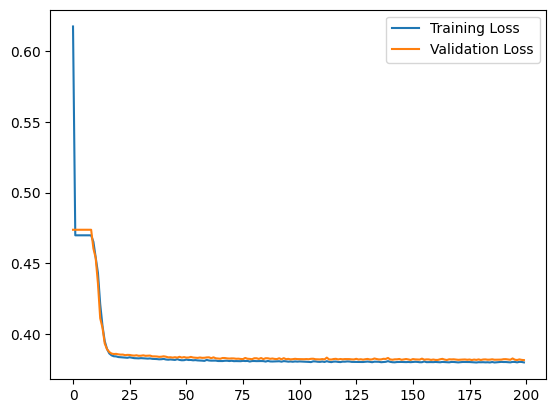

In [10]:
history = autoencoder.fit(train_data, train_data, 
          epochs=200, 
          batch_size=1024,
          validation_data=(test_data, test_data),
          shuffle=True)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [11]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions, train_data)

1019/1019 [==============================] - 1s 1ms/step


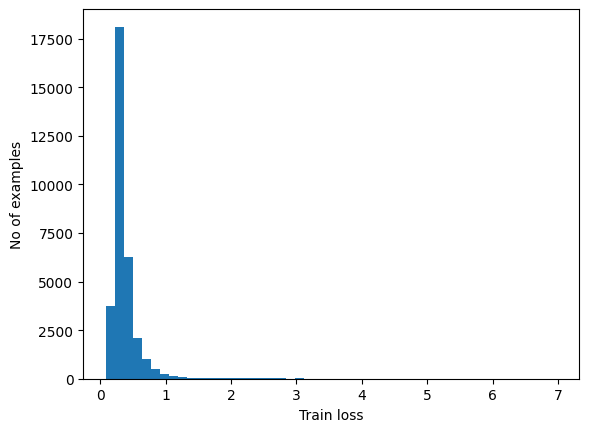

Threshold:  0.6712465


In [12]:
plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

313/313 [==============================] - 0s 958us/step


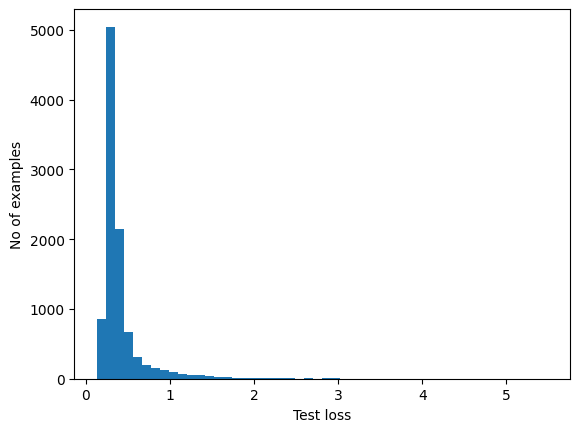

In [13]:
reconstructions = autoencoder.predict(anomalousData)
test_loss = tf.keras.losses.mae(reconstructions, anomalousData)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

#def print_stats(predictions, labels):
 # print("Accuracy = {}".format(accuracy_score(labels, predictions)))
 # print("Precision = {}".format(precision_score(labels, predictions)))
 # print("Recall = {}".format(recall_score(labels, predictions)))
preds = predict(autoencoder, anomalousData, threshold)
#print_stats(preds, test_labels)
#preds

In [14]:
pd.DataFrame(preds).to_csv("predictionsFiles.csv",header="predict", index=False)
#pd.DataFrame(preds).to_csv("predictionsFiles.csv",header="predict", index=False)
preds

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [18]:
df_predict=pd.read_csv('predictionsFiles.csv')                       

df_predict = df_predict.rename(columns={'0':'predict'})
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [19]:
#df_Untracked = df_Untracked_0[:1000]
concat = pd.concat( [df_Untracked, df_predict],axis=1, join='inner')
concat

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local,predict
0,0.0,0.0,0.0,0.0,7.0,4932.0,4008.0,0.0,0.0,0.0,0.0,0.0,0.0,3.45000,True
1,0.0,0.0,0.0,0.0,5317.0,3463.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,2.92126,True
2,0.0,0.0,0.0,3251.0,6686.0,509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.37894,True
3,0.0,0.0,0.0,0.0,1227.0,6616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.05000,True
4,0.0,0.0,0.0,649.0,12946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.05000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,3053.0,18831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.65000,True
9996,0.0,0.0,0.0,0.0,3.0,5704.0,3017.0,0.0,0.0,0.0,0.0,0.0,0.0,6.55000,True
9997,0.0,0.0,0.0,2260.0,7085.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.35000,True
9998,0.0,0.0,0.0,0.0,0.0,4008.0,5320.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25000,True


In [20]:
concat.loc[concat.predict].to_csv('notAnomaly.csv', index=False)

In [21]:
concat.loc[~concat.predict].to_csv('Anomaly.csv', index=False)